In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import trans


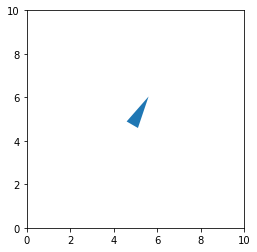

In [48]:
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
ax.set_aspect('equal')
wedge = patches.Wedge((5, 5), 1, 270-15, 270+15, alpha=2)

rot = lambda x: np.array([[np.cos(x), -np.sin(x)],[np.sin(x), np.cos(x)]])
scale = 0.3
trans = np.array([[5,5]])
pts = np.array([[-1, -1],
                [1, -1],
                [0, 4]]).dot(rot(np.radians(30)))*scale + trans



rbt = patches.Polygon(pts)
ax.add_patch(rbt)
# plt.scatter(5,5,marker=(3,1,45))
plt.show()

AttributeError: 'PathCollection' object has no attribute 'set_data'

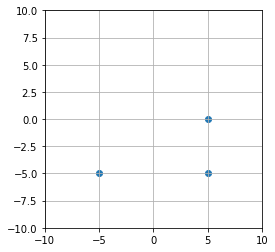

In [99]:

robots = np.array([[-5, -5, np.radians(0)],
                                [5, -5, np.radians(30)],
                                [5, 0, np.radians(90)]]).T
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
ax.set_aspect('equal')
plt.grid()
x, y, th = robots
u = np.cos(th)
v = np.sin(th)
# Q = plt.quiver(x, y, u, v, scale=25, headwidth=5)
S = ax.plot(x,y)
robots[0:2,:] += 2.5
# S.set_array(robots[0:2,:])
fig.canvas.draw()
fig.canvas.flush_events()
print(())




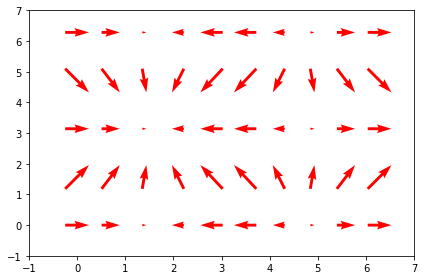

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, pivot='mid', color='r', units='inches')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = np.cos(X + num*0.1)
    V = np.sin(Y + num*0.1)

    Q.set_UVC(U,V)

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               interval=50, blit=False)
fig.tight_layout()
plt.show()